<a href="https://colab.research.google.com/github/bosephburcios/HiFi/blob/main/HiFi_JJOH_Model1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import joblib


Load the dataset:

In [2]:
from google.colab import files
uploaded = files.upload()

Saving synthetic_datav2.csv to synthetic_datav2.csv


Read the dataset


In [13]:
data = pd.read_csv('synthetic_datav2.csv')

In [14]:
#def unique(col):
#  unique_arr = []
#  for i in range(len(col)):
#    if col[i] not in unique_arr:
#      unique_arr.append(col[i])
#  return unique_arr

# unique(data["Recommendation"])

In [5]:
#data["Recommendation"][0:20]

Preprocess the data:
You'll need to one-hot encode categorical columns (Weather and Location) and normalize numerical columns (Heartbeat and Hours_Worked). Then, encode the Recommendation column into integers.

In [15]:
# Normalize numerical columns

scaler = MinMaxScaler()
data[['Heartbeat', 'Hours_Worked']] = scaler.fit_transform(data[['Heartbeat', 'Hours_Worked']])
joblib.dump(scaler, 'saved_scaler.pkl')
files.download('saved_scaler.pkl')

# One-Hot Encode categorical columns
data = pd.get_dummies(data, columns=['Weather', 'Location'])

# Convert 'Recommendation' into integers
label_encoder = LabelEncoder()
data['Recommendation'] = label_encoder.fit_transform(data['Recommendation'])
joblib.dump(label_encoder, 'label_encoder.pkl')
files.download('label_encoder.pkl')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
#data['Recommendation'][0:20]
data[0:20]

,Heartbeat,Hours_Worked,Recommendation,Weather_Cloudy,Weather_Rainy,Weather_Snowy,Weather_Sunny,Location_Rural,Location_Suburban,Location_Urban
6960,1.000000,0.222222,3,1,0,0,0,1,0,0
4471,0.016949,0.222222,1,0,0,0,1,0,0,1
5409,0.711864,1.000000,2,1,0,0,0,1,0,0
7016,0.389831,0.333333,1,0,0,0,1,0,0,1
5759,0.610169,0.444444,3,0,0,1,0,0,1,0
8314,0.796610,0.333333,3,1,0,0,0,1,0,0
5627,0.966102,0.444444,1,0,1,0,0,0,0,1
2601,0.254237,0.888889,0,0,0,0,1,0,1,0
7470,0.423729,0.444444,1,0,0,0,1,0,0,1
8790,0.576271,0.333333,3,0,0,1,0,1,0,0


Split the dataset:
Separate the features and the target variable, then split them into training and testing sets.
python


In [17]:
data = data.sample(frac=1)
X = data.drop('Recommendation', axis=1)
y = data['Recommendation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Build the Feed-Forward Neural Network:


In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(y.unique()), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Train the Model

In [19]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Epoch 1/50
250/250 [==============================] - 2s 5ms/step - loss: 0.8364 - accuracy: 0.6192 - val_loss: 0.5987 - val_accuracy: 0.6960
Epoch 2/50
250/250 [==============================] - 1s 5ms/step - loss: 0.5846 - accuracy: 0.7193 - val_loss: 0.4867 - val_accuracy: 0.7945
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5034 - accuracy: 0.7653 - val_loss: 0.4138 - val_accuracy: 0.8525
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4349 - accuracy: 0.8054 - val_loss: 0.3491 - val_accuracy: 0.8860
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3928 - accuracy: 0.8320 - val_loss: 0.3137 - val_accuracy: 0.8660
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3564 - accuracy: 0.8436 - val_loss: 0.2807 - val_accuracy: 0.9060
Epoch 7/50
250/250 [==============================] - 1s 4ms/step - loss: 0.3290 - accuracy: 0.8661 - val_loss: 0.2542 - val_accuracy: 0.9075
Epoch 

Evaluate the model:
This will give you the accuracy of the model on the test dataset.

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")


63/63 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9930
Test accuracy: 99.30%


Visualize training progress

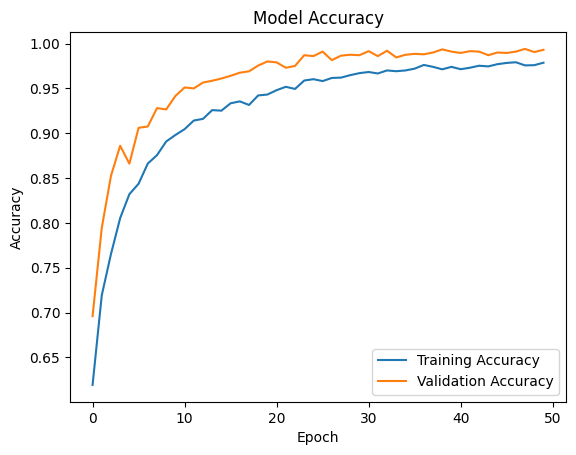

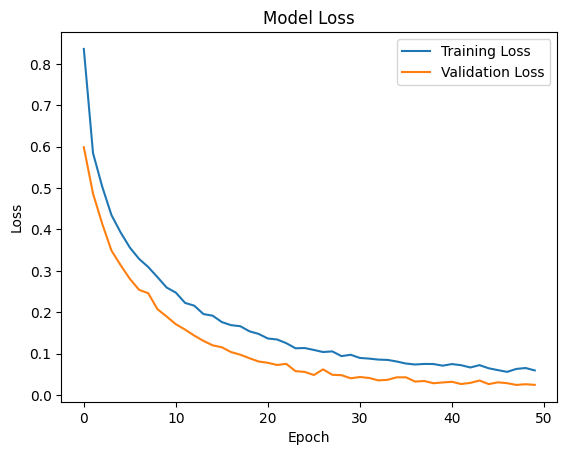

In [21]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [22]:
#model.save('recommendation_model.h5')
model.save('my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
# Install TensorFlow.js
#import tensorflowjs as tfjs
# Convert the model
#tfjs.converters.save_keras_model(model, "/content/")
#!tensorflowjs_converter --input_format keras recommendation_model.h5 /content/recommendation_model_tfjs
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
#!ls
#files.download('recommendation_model_tfjs.zip')

In [25]:
#!cat model.json

In [31]:

import joblib


# 1. Preprocessing function
def preprocess_input_data(heartbeat, hours_worked, weather, location):
    # Create a DataFrame from the inputs
    input_data = pd.DataFrame({
        'Heartbeat': [heartbeat],
        'Hours_Worked': [hours_worked],
        'Weather': [weather],
        'Location': [location]
    })

    # Normalize the numerical columns
    scaler = joblib.load('saved_scaler.pkl')
    input_data[['Heartbeat', 'Hours_Worked']] = scaler.fit_transform(input_data[['Heartbeat', 'Hours_Worked']])

    # One-Hot Encode the categorical columns

    input_data = pd.get_dummies(input_data, columns=['Weather', 'Location'])
    # Handle case where some columns might be missing after one-hot encoding
    expected_columns = ['Heartbeat', 'Hours_Worked', 'Weather_Cloudy', 'Weather_Rainy', 'Weather_Snowy', 'Weather_Sunny', 'Location_Rural', 'Location_Suburban', 'Location_Urban']
    for col in expected_columns:
        if col not in input_data.columns:
            input_data[col] = 0

    return input_data[expected_columns]

# 2. Load the model
loaded_model = tf.keras.models.load_model('my_model.h5')

# 3. Take user input
heartbeat = float(input("Enter Heartbeat (e.g., 85): "))
hours_worked = float(input("Enter Hours Worked (e.g., 9): "))
weather = input("Enter Weather (Sunny, Rainy, Cloudy, Snowy): ")
location = input("Enter Location (Urban, Suburban, Rural): ")

# 4. Preprocess the data

processed_data = preprocess_input_data(heartbeat, hours_worked, weather, location)
processed_data = processed_data.astype('float32')

# 5. Make predictions
label_encoder = joblib.load('label_encoder.pkl')
predictions = loaded_model.predict(processed_data)

# 6. Display the prediction (assuming it's a classification problem)
predicted_class_index = np.argmax(predictions, axis=1)
predicted_label = label_encoder.inverse_transform(predicted_class_index)
print(predicted_label)

# If you also need to reverse transform the predicted class to its label:
# label_encoder = LabelEncoder() # you would ideally save & load the encoder, not fit it anew
# label_encoder.fit(your_original_data['Recommendation'])
# predicted_label = label_encoder.inverse_transform([predicted_class])
# print(f"Predicted Recommendation: {predicted_label[0]}")


Enter Heartbeat (e.g., 85): 55
Enter Hours Worked (e.g., 9): 13
Enter Weather (Sunny, Rainy, Cloudy, Snowy): Rainy
Enter Location (Urban, Suburban, Rural): Suburban
1/1 [==============================] - 0s 60ms/step
['Meditation']
